In [3]:
import array_handler as ah
import numpy as np
import plot_heatmaps as ph
import matplotlib.pyplot as plt
import helper as hp

In [2]:
data_folder = '/data/fass5/projects/gl_iav-splash_freiburg/work/a7/5579062fc41faa9b6ece55778e09b8'
fasta_file = '/data/fass5/projects/gl_iav-splash_freiburg/work/a7/5579062fc41faa9b6ece55778e09b8/SC35M_WTWT.fasta'
arrays_folder = '/data/fass5/projects/gl_iav-splash_freiburg/work/a7/5579062fc41faa9b6ece55778e09b8/SC35M_WTWT_repli01_1021_arrays'

In [10]:
# Load data
genome_dict = hp.parse_fasta(fasta_file)
combination_array = hp.make_combination_array(genome_dict, intra_only=False)

In [11]:
ah.import_combination_arrays(combination_array, arrays_folder)

{('SC35M_PB2',
  'SC35M_PB1'): array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 ('SC35M_PB2',
  'SC35M_PA'): array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 ('SC35M_PB2',
  'SC35M_HA'): array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 ('SC35M_PB2',
  'SC35M_NP'): array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
      

In [17]:
def plot_heatmap(
    combination_array: np.ndarray,
    colour_palette: str,
    combination: tuple,
    colorbar_label: str = "Read counts"
) -> None:
    """
    Plot heatmap from a given combination.

    Parameters
    ----------
    combination_array : np.ndarray
        Array representing the heatmap data
    plots_folder : str
        Path to folder where plots should be saved
    colour_palette : str
        Colour palette to use for plotting
    combination : tuple
        Tuple of combination
    regions : pandas.DataFrame, optional
        A table containing the annotations for the rectangular regions, by default None
    colorbar_label : str, optional
        Label for colorbar, by default "Read counts"
    suffix : str, optional
        Suffix for the output file, by default ""

    Returns
    -------
    None
    """
    ax = plt.gca()
    plt.imshow(combination_array, cmap=colour_palette)
    set_ticks_and_grid(combination_array, ax)
    plt.colorbar(label=colorbar_label)
    plt.xlabel(f"{combination[1]}")
    plt.ylabel(f"{combination[0]}")
    plt.show(ax)
    plt.close()


def set_ticks_and_grid(combination_array: np.ndarray, ax: plt.Axes) -> None:
    """
    Set ticks, grid and tick parameters for the given axis.

    Parameters
    ----------
    combination_array : np.ndarray
        Array representing the heatmap data
    ax : plt.Axes
        Axis to set ticks and grid

    Returns
    -------
    None
    """
    ax.set_xticks(np.arange(0, combination_array.shape[1], 25))
    ax.set_xticklabels(np.arange(0, combination_array.shape[1], 25), rotation=90)
    ax.set_yticks(np.arange(0, combination_array.shape[0], 25))
    ax.set_yticklabels(np.arange(0, combination_array.shape[0], 25))
    ax.tick_params(
        axis="both", which="major", labelsize=3, labeltop=True, labelright=True
    )
    ax.grid(which="major", axis="x", linestyle="-", linewidth="0.05", color="grey")
    ax.grid(which="major", axis="y", linestyle="-", linewidth="0.05", color="grey")

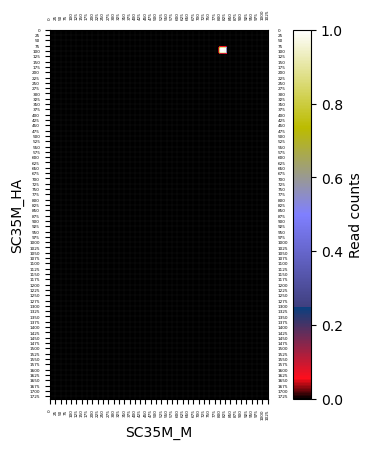

In [18]:
plot_heatmap(
    combination_array[('SC35M_HA', 'SC35M_M')],
    "gist_stern",
    ('SC35M_HA', 'SC35M_M'),
)